In [2]:
# Install dependencies for this example
import sys

!{sys.executable} -m pip install -q --upgrade --pre itk-io
!{sys.executable} -m pip install -q dask toolz scikit-image pooch matplotlib "itkwidgets>=1.0a6"

In [1]:
import pooch
from pathlib import Path

import itk
import dask.array.image

from itkwidgets import view

In [2]:
# Download data
png_files = pooch.retrieve(url='https://itk.mypinata.cloud/ipfs/bafybeihchncwrinp7rbgeqtfg5q5yrlqdneaswufpipoww6wbn26mmikrq/emdata_janelia_822252.zip',
                           known_hash='sha256:0896363b68255a31628d2c01696efd19c514b35d1ff12b09b763cedfc9e98759',
                           processor=pooch.Unzip())

This example is based on

http://matthewrocklin.com/blog/work/2017/01/17/dask-images


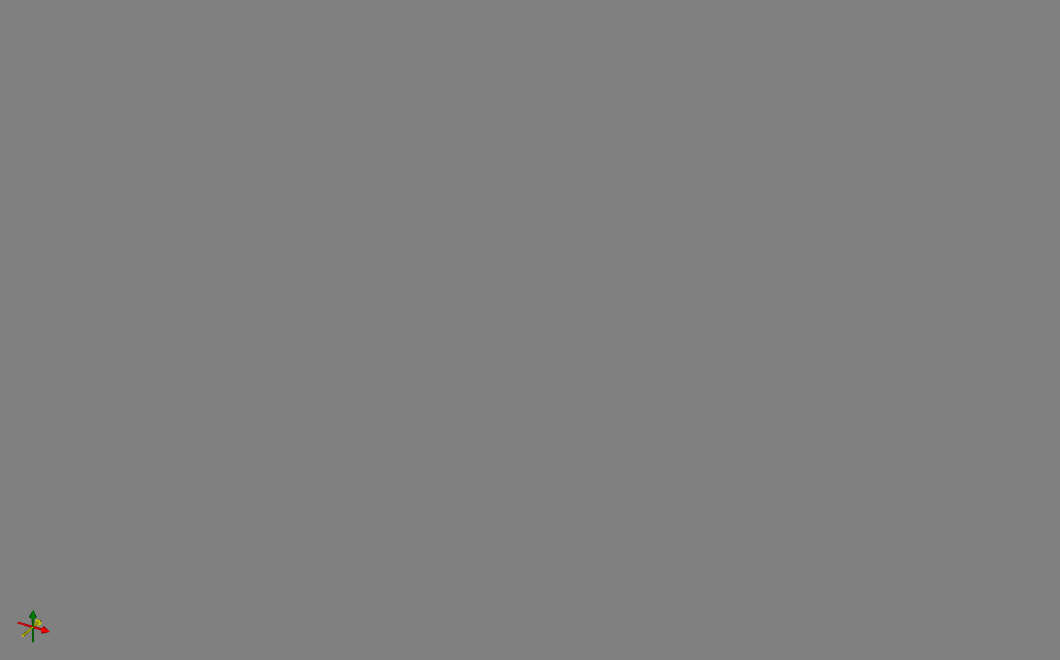
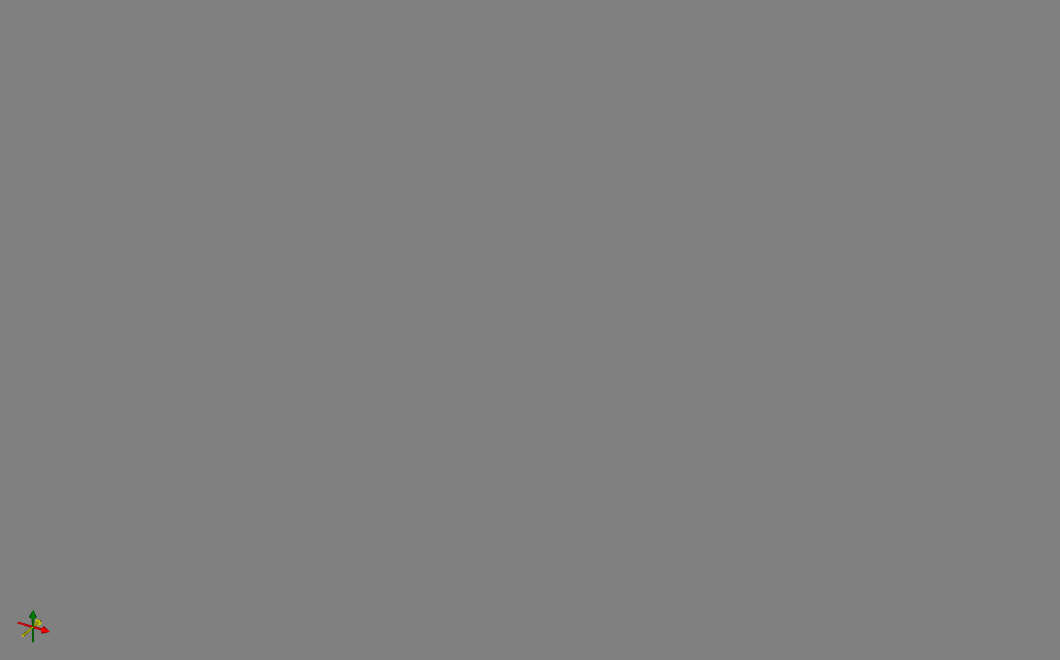

<IPython.core.display.Javascript object>

In [3]:
sample = itk.imread(png_files[0])
view(sample)

In [4]:
stack = dask.array.image.imread(str(Path(png_files[0]).parent / '*.png'))
stack

dask.array<imread, shape=(200, 200, 200), dtype=uint8, chunksize=(1, 200, 200), chunktype=numpy.ndarray>


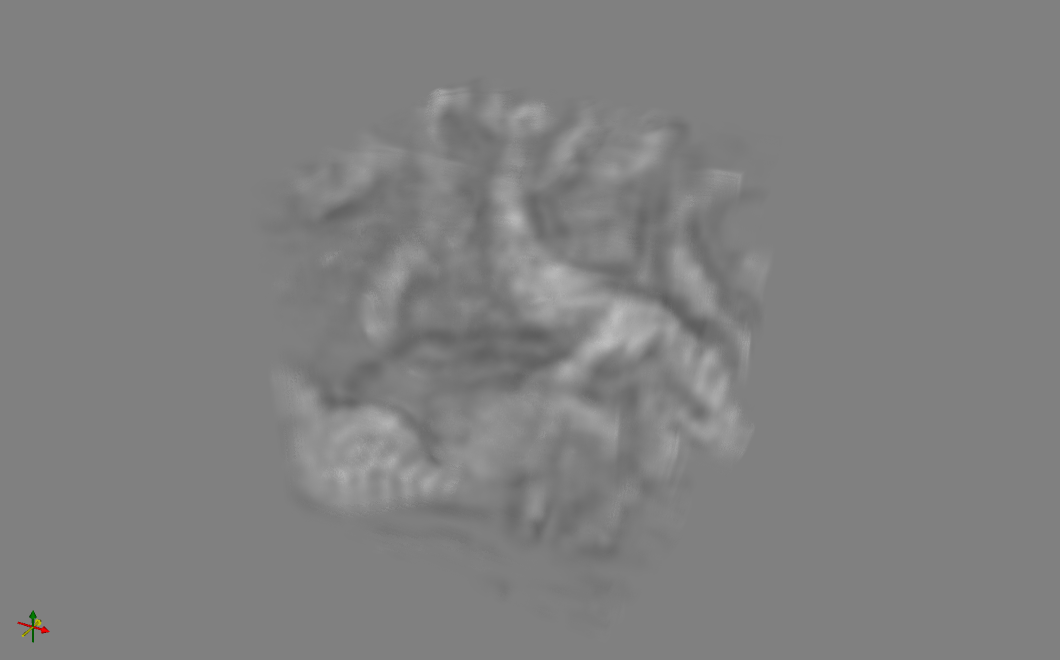
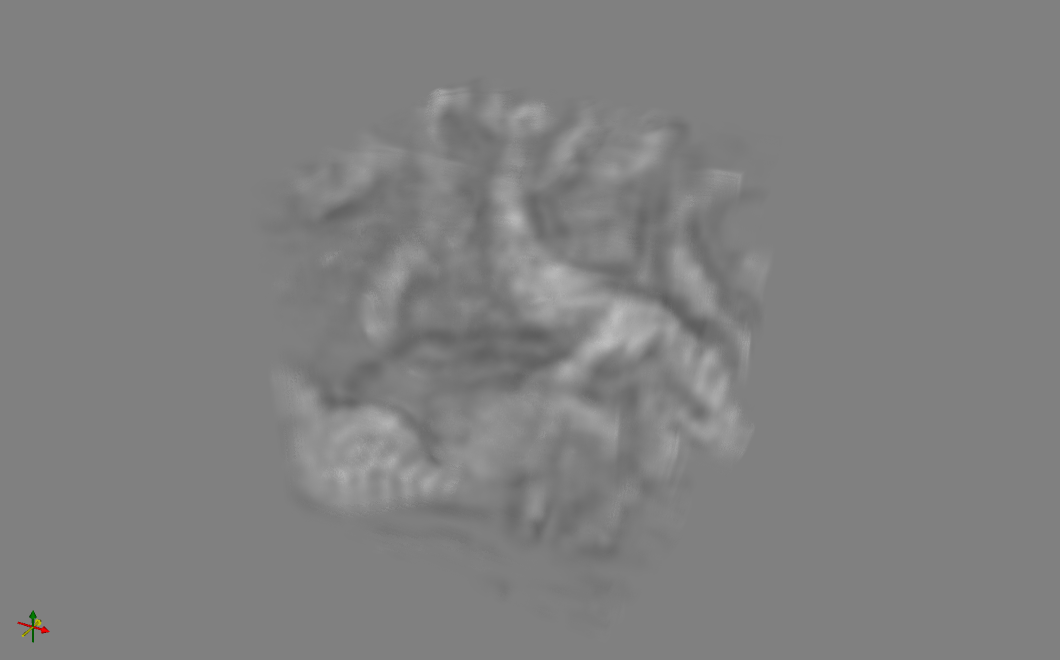

<IPython.core.display.Javascript object>

In [5]:
view(stack, shadow=False, gradient_opacity=0.4, ui_collapsed=True)